In [51]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,initializers

In [63]:
train_path = './data/train'
val_path = './data/validation'
test_path = './data/test'



train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = (10),
                            #brightness_range= (0.3, 0.9),
							#zoom_range = 0.2,
							horizontal_flip = True,)

train_generator = train_datagen.flow_from_directory(
							train_path,
							target_size = (48, 48),
							batch_size = 64,
                            color_mode = 'grayscale',
							class_mode ='categorical',
                        	)

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(
							val_path,
							target_size = (48, 48),
							batch_size = 64,
                            color_mode = 'grayscale',
							class_mode ='categorical',
                        	)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
							test_path,
							target_size = (48, 48),
							batch_size = 64,
                            color_mode = 'grayscale',
							class_mode ='categorical',
                        	)

Found 21934 images belonging to 5 classes.
Found 4698 images belonging to 5 classes.
Found 4706 images belonging to 5 classes.


In [64]:
initializer = initializers.GlorotNormal()

def build_model(input_shape=(48, 48, 1), num_classes=5):
    model = tf.keras.models.Sequential([
        # First convolution block
        tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer=initializer, input_shape=input_shape, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        # Second convolution block (similar to others)
        tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        # Third convolution block
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        # Fourth convolution block
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        # Fifth convolution block
        tf.keras.layers.Conv2D(256, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(256, (4, 4), activation='relu',kernel_initializer=initializer, padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),
        
        # Flatten the output for dense layer
        tf.keras.layers.Flatten(),
        
        # Dense layer
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    return model


# Set hyperparameters
epochs = 50
learning_rate = 0.001
loss = 'categorical_crossentropy'
batch_size = 64
momentum = 0.9
weight_decay = 0.000001

# Define optimizer
optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate, beta_1=momentum, weight_decay=weight_decay)

# Build the model
model = build_model()
model.compile(loss=loss,
						optimizer=optimizer,
						metrics=['acc'])
# Display model summary
model.summary()





Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)             │ (None, 48, 48, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 48, 48, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 24, 24, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 24, 24, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 12, 12, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 6, 6, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 6, 6, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 3, 3, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,610,501 (9.96 MB)

 Trainable params: 2,609,285 (9.95 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [65]:
history = model.fit(train_generator, validation_data = val_generator, epochs = epochs, batch_size = batch_size)
model.save('model_save.h5')


Epoch 1/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 143s 410ms/step - acc: 0.2488 - loss: 1.8782 - val_acc: 0.2869 - val_loss: 1.5984
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 140s 408ms/step - acc: 0.2937 - loss: 1.5779 - val_acc: 0.2869 - val_loss: 1.5570
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 138s 403ms/step - acc: 0.2911 - loss: 1.5506 - val_acc: 0.3587 - val_loss: 1.4456
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 149s 435ms/step - acc: 0.3418 - loss: 1.4594 - val_acc: 0.3736 - val_loss: 1.4439
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 156s 456ms/step - acc: 0.3843 - loss: 1.4023 - val_acc: 0.3883 - val_loss: 1.3903
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 153s 446ms/step - acc: 0.4014 - loss: 1.3587 - val_acc: 0.3914 - val_loss: 1.3312
Epoch 7/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 145s 423ms/step - acc: 0.4093 - loss: 1.3373 - val_acc: 0.3955 - val_loss: 1.3189
Epoch 8/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 149s 434ms/step - acc: 0.4256 - loss: 1.3167 - val_acc: 0.4608 - val_loss: 1.2477
Epoch 9/50
343/343 ━━━━━

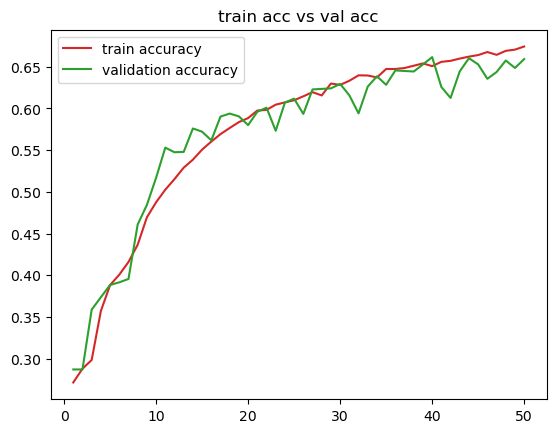

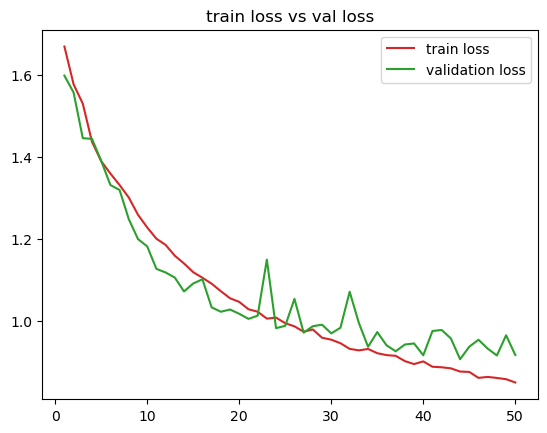

In [66]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'tab:red', label='train accuracy')
plt.plot(epochs, val_acc, 'tab:green', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'tab:red', label='train loss')
plt.plot(epochs, val_loss, 'tab:green', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [67]:
test_loss, test_acc = model.evaluate(test_generator, steps = 25)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - acc: 0.6387 - loss: 0.9334


In [68]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
model = load_model('model_save.h5')
# Predicciones y matriz de confusión
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(test_generator.classes, y_pred)
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación
target_names = list(test_generator.class_indices.keys())
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step
Matriz de Confusión:
[[118  76 223 183 144]
 [126  59 231 188 165]
 [228 117 409 324 271]
 [153  87 267 251 173]
 [154  71 274 241 173]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.16      0.15       744
     fearful       0.14      0.08      0.10       769
       happy       0.29      0.30      0.30      1349
     neutral       0.21      0.27      0.24       931
         sad       0.19      0.19      0.19       913

    accuracy                           0.21      4706
   macro avg       0.20      0.20      0.20      4706
weighted avg       0.21      0.21      0.21      4706

